In [1]:
from scipy.stats import bootstrap
from hierarchy import *
from benlib.plot import scatter_cc, remove_frames
set_publication_figure_defaults()
fig_num = 3

clusters = Clusters(12)
clusters.summarize()
clusters.mark_excluded_units()

NR <= 200:
Anaesthetised: ic: 178, mgb:  84, mgbm:   0, ac: 298, total:  560
Awake:         ic: 262, mgb: 278, mgbm:   0, ac: 341, total:  881
Total:         ic: 440, mgb: 362, mgbm:   0, ac: 639, total: 1441

NR > 200:
Anaesthetised: ic:   7, mgb:  27, mgbm:   0, ac:  55, total:   89
Awake:         ic:   1, mgb:  29, mgbm:   0, ac:   1, total:   31
Total:         ic:   8, mgb:  56, mgbm:   0, ac:  56, total:  120

Loading "coch kernels; 16 folds; ElNet"
Fieldname: coch_kernel_main
Found single data file with 1561 clusters
All results present (1561 clusters)

Loading "main elnet a2a kernels (NR=200; all units; all valid data; 1 fold)"
Fieldname: a2a_kernels_main
/Users/ben/projects/michael-data/hierarchy/results/stim-12/a2a_kernels--state=anaesthetised-awake--subset=valid20-all--combo_lens=1-2-3--n_h=8--n_fut=5--k_folds=16--fold_idxes_to_include=15--noiseratio=200--regress=ElNet
Found data files with 1441 clusters
All results present (1441 clusters)

Loading "coch kernels; 16 folds; El

In [2]:
clusters.load_analyses(['coch_kernel_main', 'a2a_kernels_main',
                        'coch_kernel_sigmoid_main', 'a2a_kernels_sigmoid_main'])

Loading "coch kernels; 16 folds; ElNet"
Fieldname: coch_kernel_main
Found single data file with 1561 clusters
All results present (1561 clusters)

Loading "main elnet a2a kernels (NR=200; all units; all valid data; 1 fold)"
Fieldname: a2a_kernels_main
/Users/ben/projects/michael-data/hierarchy/results/stim-12/a2a_kernels--state=anaesthetised-awake--subset=valid20-all--combo_lens=1-2-3--n_h=8--n_fut=5--k_folds=16--fold_idxes_to_include=15--noiseratio=200--regress=ElNet
Found data files with 1441 clusters
All results present (1441 clusters)

Loading "coch kernels; 16 folds; ElNet; LN (sigmoid)"
Fieldname: coch_kernel_sigmoid_main
Found single data file with 1561 clusters
All results present (1561 clusters)

Loading "a2a kernels; 1 fold; ElNet; LN (sigmoid)"
Fieldname: a2a_kernels_sigmoid_main
Found single data file with 1441 clusters
** Missing more than 15 results **



In [3]:
def coch_kernel_main_ln_cc_norm_test(cluster, regressor_area=None):
    return cluster['coch_kernel_sigmoid_main']['sigmoid_fits'][-1]['sigmoid']['cc_norm_test'][0]

def a2a_kernels_main_ln_cc_norm_test(cluster, regressor_area):
    return cluster['a2a_kernels_sigmoid_main']['sigmoid_fits'][regressor_area][-1]['sigmoid']['cc_norm_test'][0]

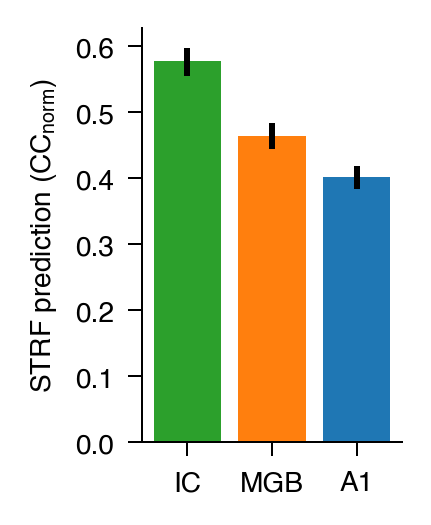

In [4]:
# median values for bar plot -- using LN model / sigmoid fits

fig = plt.figure(figsize=(1.1667,1.868))

sel = clusters.select_data(brain_area='ic', noiseratio=200, excluded=False)
cc_norm_coch_ic = [coch_kernel_main_ln_cc_norm_test(cl, None) for cl in sel]

sel = clusters.select_data(brain_area='mgb', noiseratio=200, excluded=False)
cc_norm_coch_mgb = [coch_kernel_main_ln_cc_norm_test(cl, None) for cl in sel]

sel = clusters.select_data(brain_area='ac', noiseratio=200, excluded=False)
cc_norm_coch_ac = [coch_kernel_main_ln_cc_norm_test(cl, None) for cl in sel]

data = [cc_norm_coch_ic, cc_norm_coch_mgb, cc_norm_coch_ac]

mdn = [np.median(d) for d in data]
ci = [bootstrap((d,), np.median) for d in data]
err = [(m-c.confidence_interval.low, c.confidence_interval.high-m) for m,c in zip(mdn,ci)]
err_stack = np.vstack(err).T

plt.bar([0,1,2],
        mdn,
        yerr=err_stack,
        color=[BRAIN_AREA_COLORS['ic'], BRAIN_AREA_COLORS['mgb'], BRAIN_AREA_COLORS['ac']],
        capsize=0, error_kw={'elinewidth': 1.5})

# plt.axhline(coch_mdn, color='k', linestyle='--')
plt.xticks([0,1,2], [AREA_LABELS['ic'], AREA_LABELS['mgb'], AREA_LABELS['ac']])

plt.ylabel('STRF prediction ($CC_{norm}$)')

remove_frames()

# plt.savefig('figure-2-bar.eps', bbox_inches='tight')
plt.savefig('figure-%d-bar.pdf' % fig_num, bbox_inches='tight')

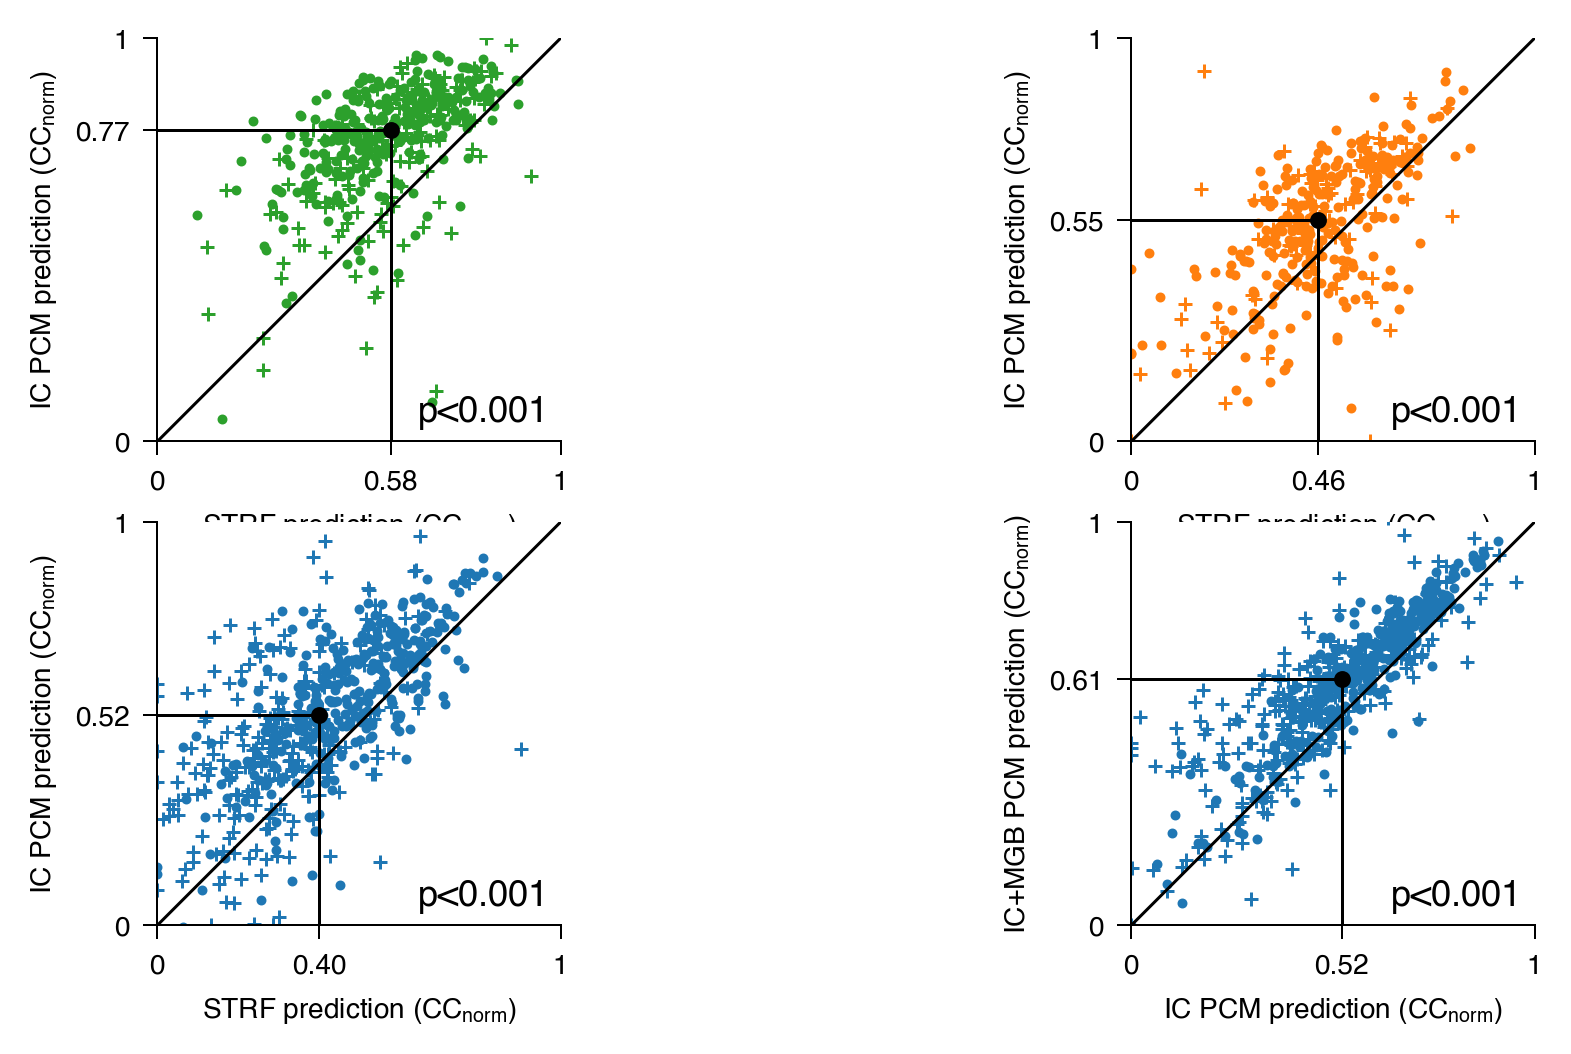

In [5]:
# Feedforward model vs cochleagram -- with awake vs anaesthetised symbols
# awake is dot, anesthetised is + 

fig = plt.figure(figsize=(8,4))

# PCM vs cochleagram -- IC -> IC
plt.subplot(2,2,1)
target_area = 'ic'
regressor_area = 'ic'
awake = clusters.select_data(brain_area=target_area, noiseratio=200, state='awake', excluded=False)
anaesthetised = clusters.select_data(brain_area=target_area, noiseratio=200, state='anaesthetised', excluded=False)
x_data = [[coch_kernel_main_ln_cc_norm_test(cl, regressor_area) for cl in awake],
          [coch_kernel_main_ln_cc_norm_test(cl, regressor_area) for cl in anaesthetised]]
y_data = [[a2a_kernels_main_ln_cc_norm_test(cl, regressor_area) for cl in awake],
          [a2a_kernels_main_ln_cc_norm_test(cl, regressor_area) for cl in anaesthetised]]
scatter_cc_multi(x_data, y_data, colors=BRAIN_AREA_COLORS['ic'],
           p_value=True, accept_nans=False)

plt.xlabel('STRF prediction ($CC_{norm}$)')
plt.ylabel('IC PCM prediction ($CC_{norm}$)')

# PCM vs cochleagram -- IC -> MGB
plt.subplot(2,2,2)
target_area = 'mgb'
regressor_area = 'ic'
awake = clusters.select_data(brain_area=target_area, noiseratio=200, state='awake', excluded=False)
anaesthetised = clusters.select_data(brain_area=target_area, noiseratio=200, state='anaesthetised', excluded=False)
x_data = [[coch_kernel_main_ln_cc_norm_test(cl, regressor_area) for cl in awake],
          [coch_kernel_main_ln_cc_norm_test(cl, regressor_area) for cl in anaesthetised]]
y_data = [[a2a_kernels_main_ln_cc_norm_test(cl, regressor_area) for cl in awake],
          [a2a_kernels_main_ln_cc_norm_test(cl, regressor_area) for cl in anaesthetised]]
scatter_cc_multi(x_data, y_data, colors=BRAIN_AREA_COLORS['mgb'],
           p_value=True, accept_nans=False)

plt.xlabel('STRF prediction ($CC_{norm}$)')
plt.ylabel('IC PCM prediction ($CC_{norm}$)')


# PCM vs cochleagram -- IC -> AC
plt.subplot(2,2,3)
target_area = 'ac'
regressor_area = 'ic'
awake = clusters.select_data(brain_area=target_area, noiseratio=200, state='awake', excluded=False)
anaesthetised = clusters.select_data(brain_area=target_area, noiseratio=200, state='anaesthetised', excluded=False)
x_data = [[coch_kernel_main_ln_cc_norm_test(cl, regressor_area) for cl in awake],
          [coch_kernel_main_ln_cc_norm_test(cl, regressor_area) for cl in anaesthetised]]
y_data = [[a2a_kernels_main_ln_cc_norm_test(cl, regressor_area) for cl in awake],
          [a2a_kernels_main_ln_cc_norm_test(cl, regressor_area) for cl in anaesthetised]]
scatter_cc_multi(x_data, y_data, colors=BRAIN_AREA_COLORS['ac'],
           p_value=True, accept_nans=False)

plt.xlabel('STRF prediction ($CC_{norm}$)')
plt.ylabel('IC PCM prediction ($CC_{norm}$)')

# PCM vs cochleagram -- IC -> IC
plt.subplot(2,2,4)
target_area = 'ac'
regressor_area_x = 'ic'
regressor_area_y = 'ic_mgb'
awake = clusters.select_data(brain_area=target_area, noiseratio=200, state='awake', excluded=False)
anaesthetised = clusters.select_data(brain_area=target_area, noiseratio=200, state='anaesthetised', excluded=False)
x_data = [[a2a_kernels_main_ln_cc_norm_test(cl, regressor_area_x) for cl in awake],
          [a2a_kernels_main_ln_cc_norm_test(cl, regressor_area_x) for cl in anaesthetised]]
y_data = [[a2a_kernels_main_ln_cc_norm_test(cl, regressor_area_y) for cl in awake],
          [a2a_kernels_main_ln_cc_norm_test(cl, regressor_area_y) for cl in anaesthetised]]
scatter_cc_multi(x_data, y_data, colors=BRAIN_AREA_COLORS['ac'],
           p_value=True, accept_nans=False)

plt.xlabel('IC PCM prediction ($CC_{norm}$)')
plt.ylabel('IC+MGB PCM prediction ($CC_{norm}$)')

remove_frames(fig)

# plt.savefig('figure-2-scatter.eps')
plt.savefig('figure-%d-scatter.pdf' % fig_num)